<a href="https://colab.research.google.com/github/MichelaMarini/MATH-6373-PyTorch-tutorial/blob/main/WEEK_2_LINEAR_REGR_and_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression vs Non-Linear Regression
Linear regression and non-linear regression are both methods used in statistics to model the relationship between a dependent variable and one or more independent variables.


*   **Linear regression** assumes that the relationship between the variables is linear, meaning that the change in the dependent variable is directly proportional to the change in the independent variable(s).
*   **Non-linear regression** allows for more complex relationships that cannot be adequately described by a straight line. This flexibility enables non-linear regression to capture patterns that linear regression cannot, making it suitable for modeling relationships that are not strictly linear. Common types of non-linear regression models include polynomial regression and exponential regression.


Epoch [10/100], Loss: 22.1855
Epoch [20/100], Loss: 10.1540
Epoch [30/100], Loss: 4.9767
Epoch [40/100], Loss: 2.7473
Epoch [50/100], Loss: 1.7860
Epoch [60/100], Loss: 1.3701
Epoch [70/100], Loss: 1.1890
Epoch [80/100], Loss: 1.1089
Epoch [90/100], Loss: 1.0725
Epoch [100/100], Loss: 1.0550


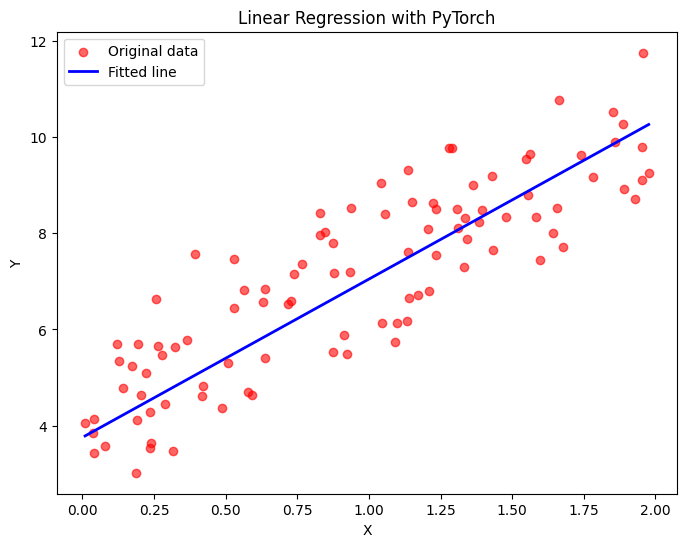

Model saved as 'model.ckpt'.


In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Hyperparameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.01  # Increased for faster convergence

# Generate dataset
x_train = 2 * np.random.rand(100, 1).astype(np.float32)  # Random numbers between 0 and 2
y_train = (4 + 3 * x_train + np.random.randn(100, 1)).astype(np.float32)  # Linear relationship with noise

# Convert numpy arrays to PyTorch tensors
x_train_tensor = torch.from_numpy(x_train).to(torch.float32)
y_train_tensor = torch.from_numpy(y_train).to(torch.float32)

# Define Linear Regression Model
model = nn.Linear(input_size, output_size)

# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Predictions after training
predicted = model(x_train_tensor).detach().numpy()

# Sort x-values for smoother plotting
sorted_indices = np.argsort(x_train[:, 0])
x_sorted = x_train[sorted_indices]
y_pred_sorted = predicted[sorted_indices]

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='red', label='Original data', alpha=0.6)
plt.plot(x_sorted, y_pred_sorted, color='blue', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression with PyTorch')
plt.show()

# Save the trained model
torch.save(model.state_dict(), 'model.ckpt')
print("Model saved as 'model.ckpt'.")


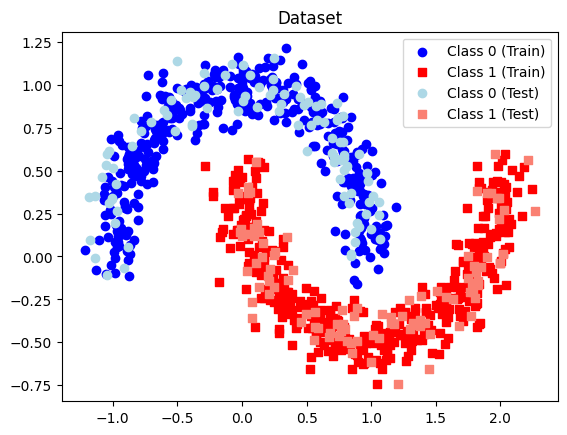

Epoch [100/1000], Linear Loss: 0.1164
Epoch [200/1000], Linear Loss: 0.0856
Epoch [300/1000], Linear Loss: 0.0851
Epoch [400/1000], Linear Loss: 0.0850
Epoch [500/1000], Linear Loss: 0.0850
Epoch [600/1000], Linear Loss: 0.0850
Epoch [700/1000], Linear Loss: 0.0850
Epoch [800/1000], Linear Loss: 0.0850
Epoch [900/1000], Linear Loss: 0.0850
Epoch [1000/1000], Linear Loss: 0.0850
Epoch [100/1000], Nonlinear Loss: 0.0179
Epoch [200/1000], Nonlinear Loss: 0.0111
Epoch [300/1000], Nonlinear Loss: 0.0100
Epoch [400/1000], Nonlinear Loss: 0.0091
Epoch [500/1000], Nonlinear Loss: 0.0081
Epoch [600/1000], Nonlinear Loss: 0.0072
Epoch [700/1000], Nonlinear Loss: 0.0064
Epoch [800/1000], Nonlinear Loss: 0.0056
Epoch [900/1000], Nonlinear Loss: 0.0052
Epoch [1000/1000], Nonlinear Loss: 0.0046


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from sklearn import datasets

# Generate moons dataset
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Plot the train dataset
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', marker='o', label='Class 0 (Train)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', marker='s', label='Class 1 (Train)')

# Plot the test dataset
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='lightblue', marker='o', label='Class 0 (Test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='salmon', marker='s', label='Class 1 (Test)')

plt.legend(loc='upper right')
plt.title('Dataset')
plt.show()

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape y_train to [n_samples, 1]
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)    # Reshape y_test to [n_samples, 1]


# Define a simple linear regression model for classification
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc = nn.Linear(2, 1)  # Input size: 2, Output size: 1

    def forward(self, x):
        return self.fc(x)

# Instantiate the linear model, loss function, and optimizer
linear_model = LinearRegressionModel()
linear_criterion = nn.MSELoss()  # Mean Squared Error loss
linear_optimizer = optim.Adam(linear_model.parameters(), lr=0.01)  # Adam optimizer

# Train the linear model
num_epochs = 1000
for epoch in range(num_epochs):
    linear_optimizer.zero_grad()
    linear_outputs = linear_model(X_train_tensor)
    linear_loss = linear_criterion(linear_outputs, y_train_tensor)
    linear_loss.backward()
    linear_optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Linear Loss: {linear_loss.item():.4f}')

# Instantiate the nonlinear model
class NonLinearRegressionModel(nn.Module):
    def __init__(self):
        super(NonLinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # Input size: 2, Output size: 64
        self.fc2 = nn.Linear(64, 1)   # Input size: 64, Output size: 1
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the nonlinear model, loss function, and optimizer
nonlinear_model = NonLinearRegressionModel()
nonlinear_criterion = nn.MSELoss()  # Mean Squared Error loss
nonlinear_optimizer = optim.Adam(nonlinear_model.parameters(), lr=0.01)  # Adam optimizer

# Train the nonlinear model
for epoch in range(num_epochs):
    nonlinear_optimizer.zero_grad()
    nonlinear_outputs = nonlinear_model(X_train_tensor)
    nonlinear_loss = nonlinear_criterion(nonlinear_outputs, y_train_tensor)
    nonlinear_loss.backward()
    nonlinear_optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Nonlinear Loss: {nonlinear_loss.item():.4f}')


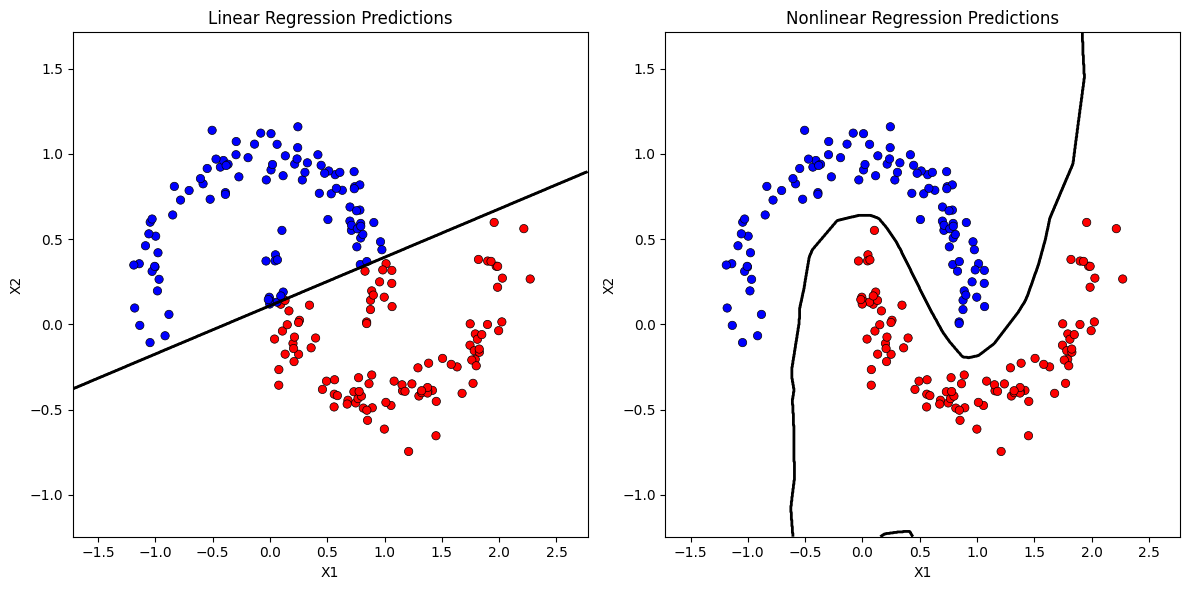

In [21]:
# Define the range for the grid (slightly expanding the min and max values of the dataset)
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5  # X-axis range
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5  # Y-axis range

# Create a mesh grid of points covering the entire feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),  # 1000 points along the x-axis
                     np.linspace(y_min, y_max, 1000))  # 1000 points along the y-axis

# Flatten the mesh grid and combine x and y coordinates into a single array of shape (10000, 2)
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Each row represents a point in the grid

# Convert the grid points into a PyTorch tensor for model evaluation
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)  # Shape (10000, 2), dtype float32

# Evaluate the models on the grid
linear_model.eval()
nonlinear_model.eval()

with torch.no_grad():
    # Predict for the entire grid for both models (linear and nonlinear)
    linear_pred_grid = (linear_model(grid_tensor).numpy().flatten() > 0.5).astype(int)  # Threshold at 0.5
    nonlinear_pred_grid = (nonlinear_model(grid_tensor).numpy().flatten() > 0.5).astype(int)

# Convert test data to tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Predict class labels for test points
with torch.no_grad():
    linear_pred_test = (linear_model(X_test_tensor).numpy().flatten() > 0.5).astype(int)  # Threshold at 0.5
    nonlinear_pred_test = (nonlinear_model(X_test_tensor).numpy().flatten() > 0.5).astype(int)

# Define colors: 0 -> blue, 1 -> red
colors = np.array(["blue", "red"])

# Plotting test dataset and regression surfaces
plt.figure(figsize=(12, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], color=colors[linear_pred_test], edgecolors='k', linewidth=0.5)
# Add decision boundary for linear model
plt.contour(xx, yy, linear_pred_grid.reshape(xx.shape), levels=[0.5], colors='black', linewidths=2)

plt.title('Linear Regression Predictions')
plt.xlabel('X1')
plt.ylabel('X2')

# Nonlinear Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], color=colors[nonlinear_pred_test], edgecolors='k', linewidth=0.5)
# Add decision boundary for nonlinear model
plt.contour(xx, yy, nonlinear_pred_grid.reshape(xx.shape), levels=[0.5], colors='black', linewidths=2)

plt.title('Nonlinear Regression Predictions')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()



# Feedforward Neural Networks

A ***feedforward neural network*** is a basic type of artificial neural network where data moves in one direction: forward. It consists of input, hidden, and output layers, processing data through interconnected nodes with weighted sums and activation functions. It's commonly used for tasks like classification and pattern recognition due to its ability to learn complex functions from data.

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 347kB/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.81MB/s]


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw

number of neurons: 8
Epoch [1/5], Loss: 0.0810
Epoch [2/5], Loss: 0.0436
Epoch [3/5], Loss: 0.0316
Epoch [4/5], Loss: 0.0262
Epoch [5/5], Loss: 0.0228
Test Accuracy: 0.8600
Test Precision: 0.8651
number of neurons: 20
Epoch [1/5], Loss: 0.0737
Epoch [2/5], Loss: 0.0315
Epoch [3/5], Loss: 0.0211
Epoch [4/5], Loss: 0.0172
Epoch [5/5], Loss: 0.0150
Test Accuracy: 0.9000
Test Precision: 0.9026
number of neurons: 40
Epoch [1/5], Loss: 0.0598
Epoch [2/5], Loss: 0.0235
Epoch [3/5], Loss: 0.0173
Epoch [4/5], Loss: 0.0146
Epoch [5/5], Loss: 0.0124
Test Accuracy: 0.9300
Test Precision: 0.9314
number of neurons: 100
Epoch [1/5], Loss: 0.0489
Epoch [2/5], Loss: 0.0193
Epoch [3/5], Loss: 0.0144
Epoch [4/5], Loss: 0.0117
Epoch [5/5], Loss: 0.0100
Test Accuracy: 0.9300
Test Precision: 0.9311


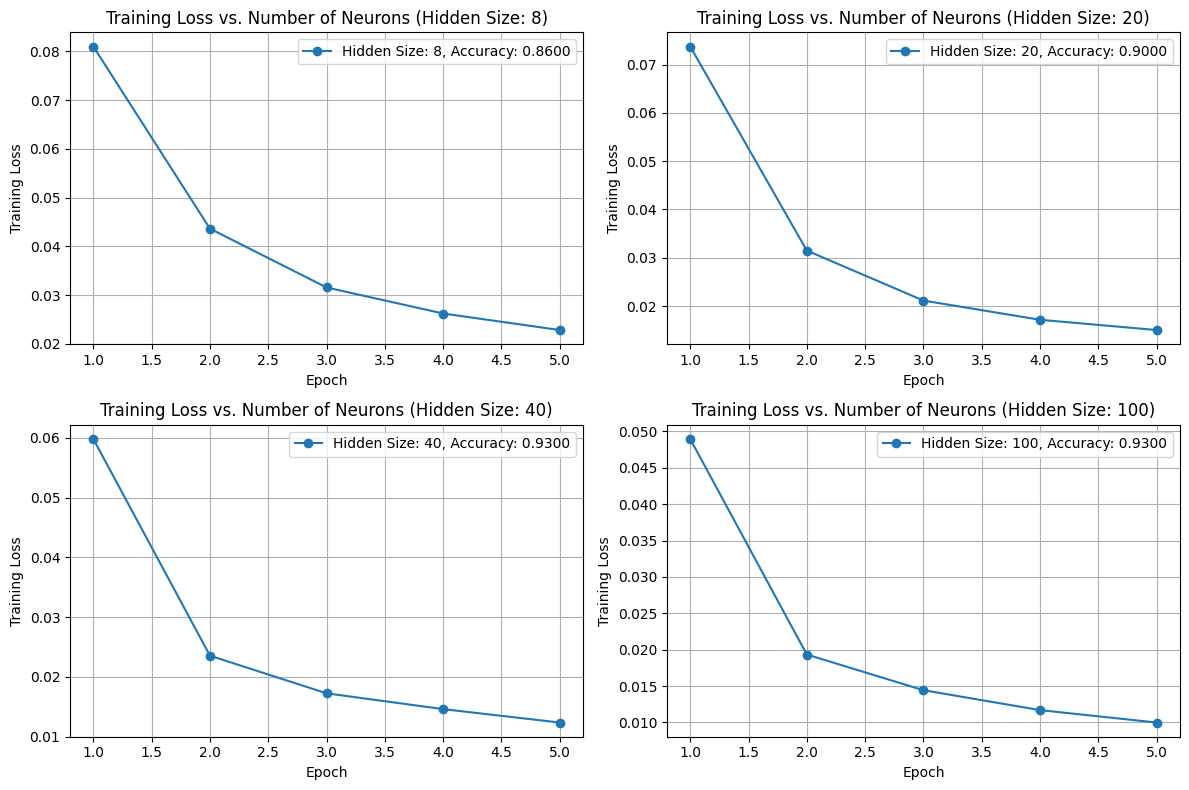

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 20
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='../../data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='../../data',
    train=False,
    transform=transforms.ToTensor()
)

# Data loader

subset_indices_train = torch.arange(3000) #3000 images

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    sampler=torch.utils.data.SubsetRandomSampler(subset_indices_train)
)

# train_loader = torch.utils.data.DataLoader(
#    dataset=train_dataset,
#    batch_size=batch_size,
#    shuffle=True
#)
subset_indices_test = torch.arange(100) # 100 images
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    sampler=torch.utils.data.SubsetRandomSampler(subset_indices_test)
)

#test_loader = torch.utils.data.DataLoader(
#    dataset=test_dataset,
#    batch_size=batch_size,
#    shuffle=False
#)

# Fully connected neural network with varying hidden layers
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train_model(num_epochs, hidden_size):
    model = FeedForwardNN(input_size, hidden_size, num_classes).to(device)  # Initialize the model
    criterion = nn.CrossEntropyLoss()  # Define loss function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Define optimizer

    train_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.reshape(-1, 28 * 28).to(device)  # Reshape images
            labels = labels.to(device)  # Move labels to the device
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    return model, train_losses


def evaluate_model(model):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    predictions = []
    true_labels = []

    with torch.no_grad():  # Disable gradient tracking during evaluation
        for images, labels in test_loader:
            images = images.reshape(-1, 28 * 28).to(device)  # Reshape images
            labels = labels.to(device)  # Move labels to the device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

    precision = precision_score(true_labels, predictions, average='weighted')
    print(f"Test Precision: {precision:.4f}")

    return accuracy, precision

hidden_layers = [8, 20, 40, 100]  # Different hidden layer sizes

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

for i, hidden_size in enumerate(hidden_layers):
    print("number of neurons:", hidden_size)
    ax = axs[i // 2, i % 2]  # Select the current subplot
    trained_model, train_losses = train_model(num_epochs, hidden_size)
    accuracy, precision = evaluate_model(trained_model)
    ax.plot(range(1, num_epochs + 1), train_losses, marker='o', label=f'Hidden Size: {hidden_size}, Accuracy: {accuracy:.4f}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Training Loss')
    ax.set_title(f'Training Loss vs. Number of Neurons (Hidden Size: {hidden_size})')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Epoch [1/1], Loss: 0.2936
Test Accuracy: 0.9573
Test Precision: 0.9574
Epoch [1/2], Loss: 0.2933
Epoch [2/2], Loss: 0.1165
Test Accuracy: 0.9695
Test Precision: 0.9697
Epoch [1/3], Loss: 0.2970
Epoch [2/3], Loss: 0.1159
Epoch [3/3], Loss: 0.0753
Test Accuracy: 0.9774
Test Precision: 0.9774
Epoch [1/4], Loss: 0.2941
Epoch [2/4], Loss: 0.1208
Epoch [3/4], Loss: 0.0787
Epoch [4/4], Loss: 0.0560
Test Accuracy: 0.9761
Test Precision: 0.9762


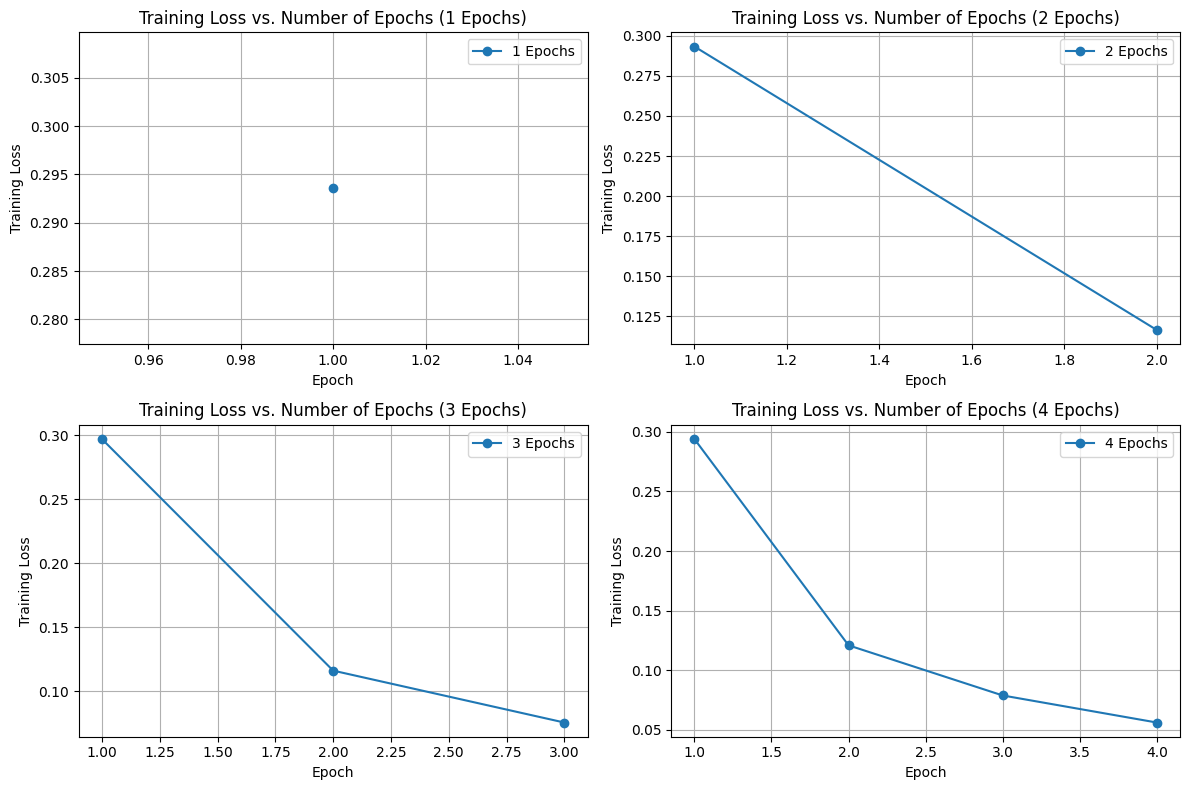

In [ ]:
# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


# Fully connected neural network with one hidden layer
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


def train_model(num_epochs):
    model = FeedForwardNN(input_size, hidden_size, num_classes).to(device)  # Initialize the model
    criterion = nn.CrossEntropyLoss()  # Define loss function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Define optimizer

    train_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)  # Reshape images
            labels = labels.to(device)  # Move labels to the device
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # plt.plot(range(1, num_epochs + 1), train_losses, label=f'{num_epochs} Epochs')

    return model, train_losses


def evaluate_model(model):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    predictions = []
    true_labels = []

    with torch.no_grad():  # Disable gradient tracking during evaluation
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)  # Reshape images
            labels = labels.to(device)  # Move labels to the device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

    precision = precision_score(true_labels, predictions, average='weighted')
    print(f"Test Precision: {precision:.4f}")

    return accuracy, precision

accuracies = []
precisions = []

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

for i, num_epochs in enumerate([1, 2, 3, 4]): #[5, 10, 15, 20]
    ax = axs[i // 2, i % 2]  # Select the current subplot
    trained_model, train_losses = train_model(num_epochs)
    accuracy, precision = evaluate_model(trained_model)
    ax.plot(range(1, num_epochs + 1), train_losses, marker='o', label=f'{num_epochs} Epochs')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Training Loss')
    ax.set_title(f'Training Loss vs. Number of Epochs ({num_epochs} Epochs)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()